# A Data Analysis on the Study "CGM Intervention in Teens and Young Adults with Type 1 Diabetes"


The aim of this notebook is to perform statistical anaylsis on the study "CGM Intervention in Teens and Young Adults with Type 1 Diabetes".

For the study the device that was implemented for the CGM patients was the Dexcom G5 which is a class II medical device. A class II medical device is an intermediate-risk device that must meet general controls as well and special controls.

Link to the clinical study: https://classic.clinicaltrials.gov/ProvidedDocs/32/NCT03240432/Prot_SAP_000.pdf


The Dexcom G5 transmits real time glucose readings every 5 minutes to a mobile medical app and will sound an alarm when a patient glucose level reaches too high or too low.

Type 1 diabetes is generally caused by the autoimmmune destruction of the insulin producing b-cells found in the pancreas. This leads the disease to manifest itself in the form of hyperglycaemia, which is high blood glucose level. This occurs due the insulin producing cells being destroyed, thus there is no insulin available to break down the blood glucose [1].

About 8% of people who have diabetes will be diagnosed with type 1. Along with this 90% of children and young adults with diabetes will have type 1. [2]

In [ ]:
#Install packages
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
from tabulate import tabulate
import scipy.stats
import math


The necessary packages that are needed to complete the statistical anaylsis are installed.

For this analysis I will be looking at how CGM compares with that of blood glucose monitoring, through comparing the overall blood glucose level and glycemic variability. The hypothesis presented in this study are as follows:


1.   Null hypothesis: There is no difference in blood glucose level at week 26 between those using BGM and CGM
2.   Alternative hypothesis: There is a nonzero difference in blood glucose level at week 26 between those using BGM and CGM.

This will be calculated using a significance level of 0.05.



In [ ]:
path="/content/drive/MyDrive/Python/roster2.csv"
from google.colab import data_table
data_table.enable_dataframe_formatter()
df1=pd.read_csv(path)
df1


,RecID,PtID,SiteID,EnrollDt,RandDt,TrtGroup,AgeAsOfEnrollDt,StudyPhase,Phase1PtStatus,Phase2PtStatus,Phase3PtStatus,Phase2RandDt,Phase2StartDt,Phase2TrtGroup,Phase3RandDt,Phase3StartDt,Phase3TrtGroup
0,10,70,11,29/01/2000 00:00,13/02/2000 14:28,CGM,16,Observational Ext,Completed,NaN,Completed,NaN,NaN,NaN,NaN,13/08/2000 00:00,NaN
1,43,47,11,01/03/2000 00:00,15/03/2000 09:41,BGM,21,Extension RCT,Completed,Completed,NaN,16/09/2000 16:44,16/09/2000 00:00,Alarms,NaN,NaN,NaN
2,44,136,11,02/03/2000 00:00,18/03/2000 15:06,BGM,19,Extension RCT,Completed,Completed,NaN,17/09/2000 15:18,17/09/2000 00:00,No Alarms,NaN,NaN,NaN
3,48,39,11,08/03/2000 00:00,24/03/2000 11:38,CGM,15,Observational Ext,Completed,NaN,Completed,NaN,NaN,NaN,NaN,17/09/2000 00:00,NaN
4,62,91,11,23/03/2000 00:00,07/04/2000 14:56,CGM,15,Observational Ext,Completed,NaN,Completed,NaN,NaN,NaN,NaN,07/10/2000 00:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,132,168,3,25/05/2000 00:00,14/07/2000 15:01,BGM,14,Primary RCT,Dropped,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
180,138,71,3,02/06/2000 00:00,17/06/2000 12:40,CGM,15,Observational Ext,Completed,NaN,Completed,NaN,NaN,NaN,NaN,13/12/2000 00:00,NaN
181,166,67,3,30/07/2000 00:00,NaN,NaN,22,Primary RCT,Dropped,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,173,130,3,20/08/2000 00:00,06/09/2000 15:39,CGM,17,Observational Ext,Completed,NaN,Completed,NaN,NaN,NaN,NaN,10/03/2001 00:00,NaN


A dataframe was created using the roster data collected during the trial. The roster dataframe provides us with information which included, the ages of the patients, the treatment group, if the patient completed each phase of the trial.

The trial was split into two main phases:

1.   Phase 1: Randomized Trial
2.   Phase 2: Extension Phase 2nd Randomization

Phase 1 involved screening, blinded CGM and baseline before randomization took place. If a pateint failed at any of the pre-trial testing such as ineligible HbA1c they were dropped from the trial. Once admitted onto the trial the participents were randomized into a CGM and BGM group. Both groups were monitored for 26 weeks, with in person and over the phone check ups. In this study the BGM group was the control group.

Phase 2 began after the 26 week visit from phase 1. Participents who were in the CGM group from phase one then got to choose if they would have the alarm on or off for their CGM device. Participents in the BGM group of phase 1 were now to recieve CGM. This time however they were randomised into 2 groups to deteremine whether their device would have alarms or not.

For this analysis I will only be considering Phase 1 of the trial

In [ ]:
df1.groupby('TrtGroup').count()

,RecID,PtID,SiteID,EnrollDt,RandDt,AgeAsOfEnrollDt,StudyPhase,Phase1PtStatus,Phase2PtStatus,Phase3PtStatus,Phase2RandDt,Phase2StartDt,Phase2TrtGroup,Phase3RandDt,Phase3StartDt,Phase3TrtGroup
TrtGroup,,,,,,,,,,,,,,,,
BGM,79,79,79,79,79,79,79,79,32,38,32,32,32,0,38,0
CGM,74,74,74,74,74,74,74,74,0,70,0,0,0,0,70,0


The groupby function was used to group the treatment groups togther to show the number of patients in each section of the trial, BGM and CGM.

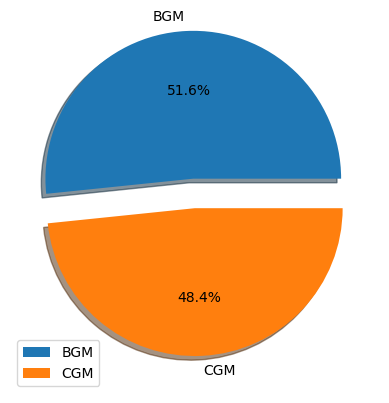

In [ ]:
y = np.array([79, 74])
mylabels = ['BGM', 'CGM']
myexplode =([0.2,0])
plt.pie(y, labels=mylabels, explode = myexplode, shadow = True, autopct = '%1.1f%%')
plt.legend()
plt.show()

The information that was presented in the above table due to the groupby function was then able to be processed and presented in the form of a pie chart.

In [ ]:
path="/content/drive/MyDrive/Python/Screening.csv"
from google.colab import data_table
data_table.enable_dataframe_formatter()
df2=pd.read_csv(path)
df2

,RecID,PtID,ParentLoginVisitID,EligCritMet,ExclCritAbsent,Sex,Ethnicity,Race,DiagDt,DiagDtApprox,...,PreExistMedCond,PtCurrMed,SHNumEverB,SHMostRecentB,SHLast12MonthsB,SHSeizComaNumB,SHSeizComaLast12MonthsB,DKANumEverB,DKAMostRecentB,DKALast12MonthsB
0,12,70,16,1,1,M,Hispanic or Latino,Black/African American,21/03/1989 00:00,NaN,...,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,41,47,82,1,1,F,Not Hispanic or Latino,White,11/09/1979 00:00,NaN,...,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,42,136,91,1,1,F,Not Hispanic or Latino,White,20/09/1989 00:00,1.0,...,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,45,39,102,1,1,M,Not Hispanic or Latino,White,11/07/1987 00:00,1.0,...,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,69,91,228,1,1,M,Not Hispanic or Latino,White,04/05/1996 00:00,NaN,...,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,128,180,561,1,1,M,Not Hispanic or Latino,American Indian/Alaskan Native,NaN,NaN,...,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,131,168,612,1,1,F,Not Hispanic or Latino,White,NaN,NaN,...,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,132,71,623,1,1,M,Not Hispanic or Latino,White,07/11/1998 00:00,1.0,...,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,159,130,955,1,1,F,Not Hispanic or Latino,White,20/06/1999 00:00,NaN,...,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


A new dataframe was created using the data from the intial screening, which provided the background information for potential participants of the trial.

In [ ]:
df_crosstab = pd.crosstab(df2['Ethnicity'],
                          df2['Race'])
print(df_crosstab)

Race                    American Indian/Alaskan Native  Asian  \
Ethnicity                                                       
Hispanic or Latino                                   0      0   
Not Hispanic or Latino                               1      6   
Unknown/not reported                                 0      0   

Race                    Black/African American  More than one race  \
Ethnicity                                                            
Hispanic or Latino                           3                   4   
Not Hispanic or Latino                      12                   6   
Unknown/not reported                         0                   1   

Race                    Unknown/not reported  White  
Ethnicity                                            
Hispanic or Latino                         9     21  
Not Hispanic or Latino                     0    106  
Unknown/not reported                       0      2  


A contingency table was created to show the different ethnicities and races of the patients completing the study.

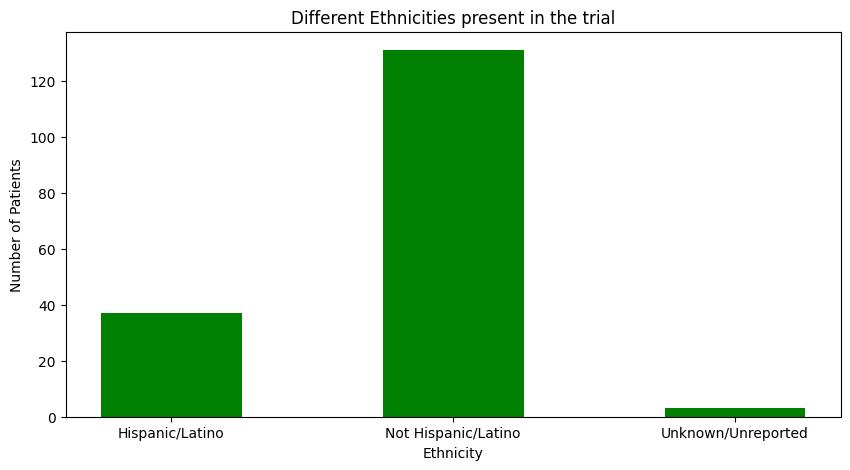

In [ ]:
data = {'Hispanic/Latino':37, 'Not Hispanic/Latino':131, 'Unknown/Unreported':3}
fig = plt.figure(figsize = (10,5))
Ethnicity = list(data.keys())
Values = list(data.values())
plt.bar(Ethnicity, Values, color = 'green', width = 0.5)
plt.xlabel('Ethnicity')
plt.ylabel('Number of Patients')
plt.title('Different Ethnicities present in the trial')
plt.show()

The data from the contingency table was used to create this bar chart showing the different ethnicities

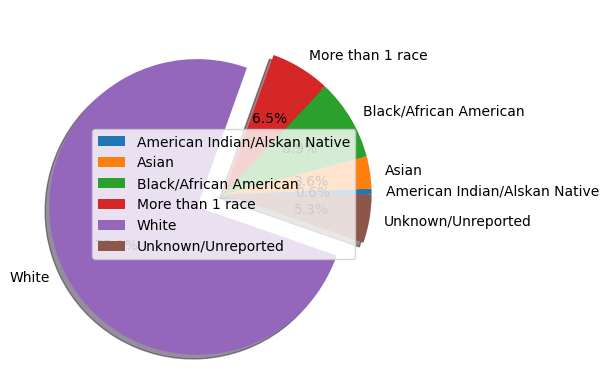

In [ ]:
y = np.array([1, 6, 15, 11, 127, 9])
mylabels = ['American Indian/Alskan Native', 'Asian', 'Black/African American', 'More than 1 race', 'White', 'Unknown/Unreported']
myexplode =([0,0,0,0,0.2,0])
plt.pie(y, labels=mylabels, explode = myexplode, shadow = True, autopct = '%1.1f%%')
plt.legend()
plt.show()

Following on a pie chart was created showing the different races.

In [ ]:
path="/content/drive/MyDrive/Python/adverseevent.csv"
from google.colab import data_table
data_table.enable_dataframe_formatter()
df3=pd.read_csv(path)
df3

,RecID,PtID,ParentLoginVisitID,AENotifiedDt,MedicalCondition,MedicalConditionMM,AdverseEventType,AEOnsetDt,AEPrEnroll,AENotedStdyVisExam,...,MMAESerious,MMUnexpected,AERelStdyDrugDevice,AERelStdyDrugDeviceUncertain,MMHospDiscRptObtained,AERelStdyTrtHighLvl,AERelStdyTrtWhich,AERelStdyDrugDeviceHighLvl,AERelStdyDrugDeviceWhich,MMAERelStdyTrtHighLvl
0,20,154,NaN,03/09/2000 00:00,Diabetic ketoacidosis,Diabetic ketoacidosis,NaN,03/09/2000 00:00,No,No,...,Yes,NaN,NaN,NaN,"No, Not Requested",NaN,NaN,NaN,NaN,NaN
1,15,107,NaN,04/08/2000 00:00,Hypoglycemia,Hypoglycemia,NaN,04/08/2000 00:00,No,No,...,Yes,NaN,NaN,NaN,"No, Not Requested",NaN,NaN,NaN,NaN,NaN
2,30,1,NaN,11/01/2001 00:00,Depression,Depression,NaN,04/01/2001 00:00,Yes,No,...,Yes,NaN,NaN,NaN,"No, Not Requested",NaN,NaN,NaN,NaN,NaN
3,34,52,NaN,08/02/2001 00:00,Hypoglycemia,Hypoglycemia,NaN,07/02/2001 00:00,No,No,...,Yes,NaN,NaN,NaN,"No, Not Requested",NaN,NaN,NaN,NaN,NaN
4,35,52,NaN,11/08/2000 00:00,Diabetic ketoacidosis,Diabetic ketoacidosis,NaN,05/07/2000 00:00,Yes,No,...,Yes,NaN,NaN,NaN,"No, Not Requested",NaN,NaN,NaN,NaN,NaN
5,23,87,NaN,08/10/2000 00:00,Vomiting,Vomiting,NaN,08/10/2000 00:00,No,No,...,No,No,NaN,NaN,"No, Not Requested",Study diagnostic procedure,NaN,NaN,NaN,Study diagnostic procedure
6,40,106,NaN,05/07/2001 00:00,Pyelonephritis,Pyelonephritis,NaN,17/06/2001 00:00,No,No,...,Yes,NaN,NaN,NaN,"No, Not Requested",NaN,NaN,NaN,NaN,NaN
7,13,56,NaN,22/06/2000 00:00,Panic attack,Panic attack,NaN,08/06/2000 00:00,No,No,...,No,NaN,NaN,NaN,"No, Not Requested",NaN,NaN,NaN,NaN,NaN
8,21,144,NaN,17/08/2000 00:00,Syncope,Syncope,NaN,13/08/2000 00:00,No,No,...,Yes,NaN,NaN,NaN,"No, Not Requested",NaN,NaN,NaN,NaN,NaN
9,25,144,NaN,06/11/2000 00:00,Fainting,Fainting,NaN,05/11/2000 00:00,No,No,...,Yes,NaN,NaN,NaN,"No, Not Requested",NaN,NaN,NaN,NaN,NaN


Another dataframe was created to show the data collected on adverse events that occured during the trial. An adverse event is "any untoward medical occurence in a study participant, irrespective of the relationship between the adverse event and the device(s) under investigation."

In [ ]:
df3.groupby('AEIntensity').count()

,RecID,PtID,ParentLoginVisitID,AENotifiedDt,MedicalCondition,MedicalConditionMM,AdverseEventType,AEOnsetDt,AEPrEnroll,AENotedStdyVisExam,...,MMAESerious,MMUnexpected,AERelStdyDrugDevice,AERelStdyDrugDeviceUncertain,MMHospDiscRptObtained,AERelStdyTrtHighLvl,AERelStdyTrtWhich,AERelStdyDrugDeviceHighLvl,AERelStdyDrugDeviceWhich,MMAERelStdyTrtHighLvl
AEIntensity,,,,,,,,,,,,,,,,,,,,,
Mild,4,4,0,4,4,4,0,4,4,4,...,4,2,0,0,4,1,0,0,0,1
Moderate,16,16,0,16,16,16,0,16,16,16,...,16,0,0,0,16,0,0,0,0,0
Severe,13,13,0,13,13,13,0,13,13,13,...,13,0,0,0,13,0,0,0,0,0


Groupby was used to group the events based on their severity. For the study an adverse event was rated on a three point scale as either mild, moderate or severe. As this is just a measures of intensity a severe event may not be that serious. How the intensity rating was decided is seen below.


1.   Mild: Usually transient, requires no special treatment, and does not interfere with the participant's daily activities
2.   Moderate: Usually causes a low level of inconvience or concern to the participant and may interfere with daily activities, but is usually ameliorated by simple therapeutic measures
3. Severe: Interrupts a participants's usual daily activities and generally requires systemic drug therapy or other treatment.

Whether or not the adverse event was caused due to the study will be decided by the study investigator.

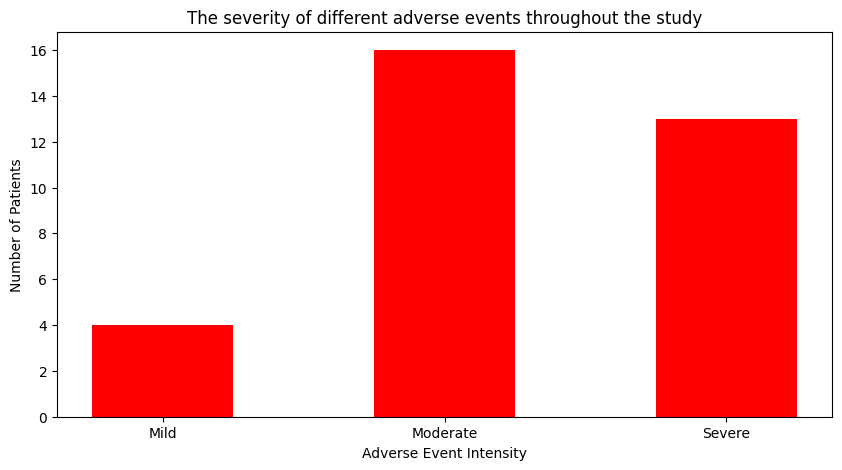

In [ ]:
data = {'Mild':4, 'Moderate':16, 'Severe':13}
fig = plt.figure(figsize = (10,5))
Adverse_event_intensity = list(data.keys())
Values = list(data.values())
plt.bar(Adverse_event_intensity, Values, color = 'red', width = 0.5)
plt.xlabel('Adverse Event Intensity')
plt.ylabel('Number of Patients')
plt.title('The severity of different adverse events throughout the study')
plt.show()

This data was then visualised in the bar chart.

In [ ]:
path="/content/drive/MyDrive/Python/Adverse event.csv"
from google.colab import data_table
data_table.enable_dataframe_formatter()
df4=pd.read_csv(path)
df4

,RecID,PtID,ParentLoginVisitID,DKAOccurDt,DKAOccurDtApprox,DKAOccurDtUnk,DKAMetCriteria,GlucLevel,GlucLevelUnits,GlucLevelUnk,...,CerebEdema,EventCauseStdyDev,EventCauseNonStdy,DKAOutcome,SensorWear,SensorGluc,SensorGlucUnits,SensorGlucUnk,AutoInsDelivWear,AutoInsDelivMode
0,4,154,NaN,03/09/2000 00:00,NaN,NaN,Cant deter,288.0,mg/dL,NaN,...,No,No,Yes,Other,Yes,NaN,NaN,1.0,No,NaN
1,12,52,NaN,05/07/2000 00:00,NaN,NaN,Definitely,600.0,mg/dL,NaN,...,No,No,Yes,Fully recovered,Unknown,NaN,NaN,NaN,No,NaN
2,7,183,NaN,02/09/2000 00:00,NaN,NaN,No,328.0,mg/dL,NaN,...,No,No,No,Fully recovered,Yes,NaN,NaN,1.0,No,NaN
3,13,131,NaN,24/04/2001 00:00,NaN,NaN,Definitely,587.0,mg/dL,NaN,...,No,No,Yes,Fully recovered,No,NaN,NaN,NaN,No,NaN
4,10,116,NaN,16/12/2000 00:00,NaN,NaN,No,516.0,mg/dL,NaN,...,No,No,Yes,Fully recovered,No,NaN,NaN,NaN,No,NaN
5,9,27,NaN,17/12/2000 00:00,NaN,NaN,No,331.0,mg/dL,NaN,...,No,No,Yes,Fully recovered,Yes,NaN,NaN,1.0,No,NaN
6,11,94,NaN,12/12/2000 00:00,NaN,NaN,Definitely,617.0,mg/dL,NaN,...,No,Yes,No,Fully recovered,No,NaN,NaN,NaN,No,NaN
7,2,161,NaN,28/02/2000 00:00,NaN,NaN,Cant deter,NaN,NaN,1.0,...,Unknown,No,No,Fully recovered,No,NaN,NaN,NaN,No,NaN
8,3,57,NaN,15/08/2000 00:00,NaN,NaN,No,532.0,mg/dL,NaN,...,Unknown,No,Yes,Fully recovered,No,NaN,NaN,NaN,No,NaN
9,6,71,NaN,21/09/2000 00:00,NaN,NaN,Definitely,478.0,mg/dL,NaN,...,Unknown,Yes,Yes,Other,Yes,NaN,NaN,1.0,No,NaN


A dataframe was created on the data related to Diabetic Ketoacidosis, which involves symptoms such as polyuria, nausea or vomitting, serum ketones>1.5mmol/L or large/moderate keytones; either arterial blood pH<7.30 or venous pH<7.24 or serum biocarbonate<1.5; and treatment provided in a healthcare facility.

Diabetic ketoacidosis is a serious condition that can occur as a result of diabetes. The lack of insulin means the body cannot use sugar for energy so instead uses fat. However the breakdown of fat releases chemicals known as ketones. Ketones are acidic, and if let unchecked to build up can make the blood acidic.

Although it can affect people with type 2 diabetes it mainly occurs in people with type 1.

In [ ]:
a = df4[['GlucLevel']].mean()
b = df4[['GlucLevel']].std()
print(a)
print(b)

GlucLevel    475.222222
dtype: float64
GlucLevel    127.762258
dtype: float64


From the calculations above we can see that when diabetic ketoacidosis occurs the average blood glucose is much higher than what it should be, highlighting how dangerous it can.

Along with this the standard deviation is also larger indication a high glycemic variability.

In [ ]:
df_crosstab = pd.crosstab(df4['DKAMetCriteria'],
                          df4['DKAOutcome'])
print(df_crosstab)


DKAOutcome      Fully recovered  Other
DKAMetCriteria                        
Cant deter                    1      1
Definitely                    3      1
No                            4      0


A simply contingency table was created to show the outcome and if the event met the criteria for it to have thought to be caused by the trial itself.

In [ ]:
path="/content/drive/MyDrive/Python/Device CGM.csv"
from google.colab import data_table
data_table.enable_dataframe_formatter()
df5=pd.read_csv(path)
df5

,RecID,PtID,ParentCITYDeviceUploadsID,DeviceDtTm,RecordType,Value,Units,SortOrd
0,1539485,39,651,21/04/2000 04:31,CGM,135,mg/dL,7880
1,1539486,39,651,21/04/2000 04:36,CGM,133,mg/dL,7881
2,1539487,39,651,21/04/2000 04:41,CGM,133,mg/dL,7882
3,1539488,39,651,21/04/2000 04:46,CGM,133,mg/dL,7883
4,1539489,39,651,21/04/2000 04:51,CGM,134,mg/dL,7884
...,...,...,...,...,...,...,...,...
1048570,2932875,152,872,18/02/2000 14:44,CGM,233,mg/dL,3276
1048571,2932876,152,872,18/02/2000 14:49,CGM,230,mg/dL,3277
1048572,2932877,152,872,18/02/2000 14:54,CGM,229,mg/dL,3278
1048573,2932878,182,873,09/03/2000 13:34,Calibration,215,mg/dL,1


This dataframe contains the readings obtained from the CGM device for the CGM group. As can be seen from the dataframe glucose values were taken every 5 seconds.

In [ ]:
df5_1 = df5[['RecordType', 'Value',]]
df5_1.groupby(['RecordType', 'Value']).count()


Empty DataFrame
Columns: []
Index: [(CGM, 39), (CGM, 40), (CGM, 41), (CGM, 42), (CGM, 43), (CGM, 44), (CGM, 45), (CGM, 46), (CGM, 47), (CGM, 48), (CGM, 49), (CGM, 50), (CGM, 51), (CGM, 52), (CGM, 53), (CGM, 54), (CGM, 55), (CGM, 56), (CGM, 57), (CGM, 58), (CGM, 59), (CGM, 60), (CGM, 61), (CGM, 62), (CGM, 63), (CGM, 64), (CGM, 65), (CGM, 66), (CGM, 67), (CGM, 68), (CGM, 69), (CGM, 70), (CGM, 71), (CGM, 72), (CGM, 73), (CGM, 74), (CGM, 75), (CGM, 76), (CGM, 77), (CGM, 78), (CGM, 79), (CGM, 80), (CGM, 81), (CGM, 82), (CGM, 83), (CGM, 84), (CGM, 85), (CGM, 86), (CGM, 87), (CGM, 88), (CGM, 89), (CGM, 90), (CGM, 91), (CGM, 92), (CGM, 93), (CGM, 94), (CGM, 95), (CGM, 96), (CGM, 97), (CGM, 98), (CGM, 99), (CGM, 100), (CGM, 101), (CGM, 102), (CGM, 103), (CGM, 104), (CGM, 105), (CGM, 106), (CGM, 107), (CGM, 108), (CGM, 109), (CGM, 110), (CGM, 111), (CGM, 112), (CGM, 113), (CGM, 114), (CGM, 115), (CGM, 116), (CGM, 117), (CGM, 118), (CGM, 119), (CGM, 120), (CGM, 121), (CGM, 122), (CGM, 123), (CGM, 124), (CGM, 125), (CGM, 126), (CGM, 127), (CGM, 128), (CGM, 129), (CGM, 130), (CGM, 131), (CGM, 132), (CGM, 133), (CGM, 134), (CGM, 135), (CGM, 136), (CGM, 137), (CGM, 138), ...]

[838 rows x 0 columns]

The data was grouped togther by value and record type to show which values were actually taken from the CGM device and which were obtained for callibration of the device.

In [ ]:
CGM_glucose_value_total = df5['Value'].count()
print(CGM_glucose_value_total)

1048575


The total number of glucose readings was calculated using the count function. This value is used in later calculations.

In [ ]:
CGM_glucose_values_in_sections = df5_1.groupby(pd.cut(df5_1['Value'], [0, 80, 180, 600 ])).count()
print(CGM_glucose_values_in_sections)

            RecordType   Value
Value                         
(0, 80]          67806   67806
(80, 180]       409535  409535
(180, 600]      571234  571234


Using the groupby and cut functions the values were separted into three different range groups:


1.   0 - 80
2.   80 - 180
3.  180 - 600

These values were chosen as for a diabetic the normal blood glucose value range is between 80 and 180 mg/dL. Although they can vary due to different confounding factors such as if the person has ate recently, usually if the value goes below or above this range it can be considered hypoglycemia or hyperglycemia respectfully.

As stated earlier for a type 1 diabetic it is far more common fro them to experience hyperglycemia.

*Value 600 was chosen as no value went above this number.


In [ ]:
less_than_70 = (67806/CGM_glucose_value_total)*100
between_70_150 = (409535/CGM_glucose_value_total)*100
greater_than_150 = (571234/CGM_glucose_value_total)*100
print(less_than_70)
print(between_70_150)
print(greater_than_150)

6.466490236749875
39.05633836397015
54.477171399279975


The values that were found above were then divided by the CGM_glucose_value_total, which was found earlier, and multiplied by to give the percentage of values in each group.

This was displayed in the table below.

In [ ]:
myCGMdata = [
    ['<80', '6.46'],
    ['80<GL<180', '39.06'],
    ['>180', '54.48'],
]

head = ['CGM Glucose Value', 'Percentage of Values in that Range']
print(tabulate(myCGMdata, headers=head, tablefmt = 'grid'))

+---------------------+--------------------------------------+
| CGM Glucose Value   |   Percentage of Values in that Range |
+=====================+======================================+
| <80                 |                                 6.46 |
+---------------------+--------------------------------------+
| 80<GL<180           |                                39.06 |
+---------------------+--------------------------------------+
| >180                |                                54.48 |
+---------------------+--------------------------------------+


From the table it can be seen that the group that has the highest percentage is the greater than 180 group. This suggests that from the glucose values measured alot of the participents may have been verging on becoming hyperglycemic, however this table does not give an indicator of how far over the 180 mg/dL each value was.  


This can be further investigated by comparing this data with dataframe 3, which holds the information about adverse events. This dataframe shows that 5 hyperglyemic events occurred throughout the study.


For this study however hyperglycemia was only classed as an adverse event if it met one of the following criteria:


1.   The event involved DKA or;
2.   In the absence of DKA if evaluation or treatmment was obtained at a healthcare provider facility



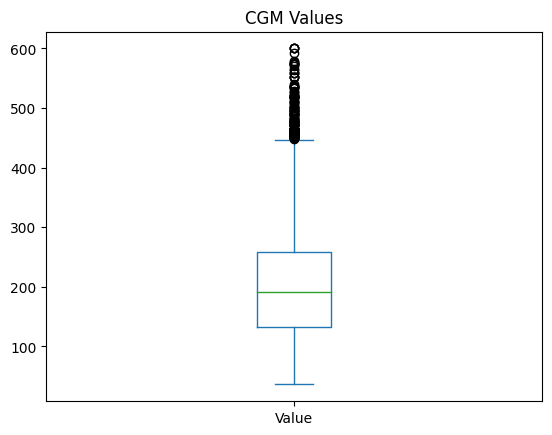

In [ ]:
df5['Value'].plot(kind='box', title = 'CGM Values')
plt.show()

The data can also be displayed in a box plot showing the different values the CGM takes on throughout the study.

The box plot helps to visualise where most of the values fall which supports the calculations performed above.

In [ ]:
path="/content/drive/MyDrive/Python/CGM RCT.csv"
from google.colab import data_table
data_table.enable_dataframe_formatter()
df6=pd.read_csv(path)
df6

,PtID,DeviceDtTm,Value,TrtGroup,nightFlg,visit,period
0,70,29JAN2000:16:11:21.000,93,CGM,0,Randomization,1) Baseline
1,70,29JAN2000:16:16:21.000,92,CGM,0,Randomization,1) Baseline
2,70,29JAN2000:16:21:21.000,96,CGM,0,Randomization,1) Baseline
3,70,29JAN2000:16:26:22.000,101,CGM,0,Randomization,1) Baseline
4,70,29JAN2000:16:31:21.000,107,CGM,0,Randomization,1) Baseline
...,...,...,...,...,...,...,...
1048570,44,15JUL2000:17:54:09.000,186,BGM,0,13 week visit,2) Follow-up (Phase 1)
1048571,44,15JUL2000:17:59:09.000,186,BGM,0,13 week visit,2) Follow-up (Phase 1)
1048572,44,15JUL2000:18:04:09.000,193,BGM,0,13 week visit,2) Follow-up (Phase 1)
1048573,44,15JUL2000:18:09:09.000,216,BGM,0,13 week visit,2) Follow-up (Phase 1)


In [ ]:
df6_1 = pd.DataFrame()
df6_1['DateTime'] = df6['DeviceDtTm']
df6_1['Glucose Value'] = df6['Value']
df6_1['Patient ID'] = df6['PtID']
df6_1['DateTime'] = pd.to_datetime(df6_1['DateTime'], format = '%d%b%Y:%H:%M:%S.%f')
df6_1

,DateTime,Glucose Value,Patient ID
0,2000-01-29 16:11:21,93,70
1,2000-01-29 16:16:21,92,70
2,2000-01-29 16:21:21,96,70
3,2000-01-29 16:26:22,101,70
4,2000-01-29 16:31:21,107,70
...,...,...,...
1048570,2000-07-15 17:54:09,186,44
1048571,2000-07-15 17:59:09,186,44
1048572,2000-07-15 18:04:09,193,44
1048573,2000-07-15 18:09:09,216,44


From df6 a new dataframe named df6_1 was created to only show the DateTime, Glucose Value and Patient ID columns. Along with this the format of the DateTime column was adjusted so that it was able to represent the date and time in a more clear format.

In [ ]:
df6_2 = df6_1[df6_1['Patient ID']==70]
df6_2

,DateTime,Glucose Value,Patient ID
0,2000-01-29 16:11:21,93,70
1,2000-01-29 16:16:21,92,70
2,2000-01-29 16:21:21,96,70
3,2000-01-29 16:26:22,101,70
4,2000-01-29 16:31:21,107,70
...,...,...,...
5693,2000-08-05 15:30:03,315,70
5694,2000-08-05 15:35:03,289,70
5695,2000-08-05 15:40:03,309,70
5696,2000-08-05 15:45:03,306,70


df_2 was created to only show the glucose values of Patient ID 70

Text(0.5, 1.0, 'Glucose Values of Patient ID 70 (A CGM Patient)')

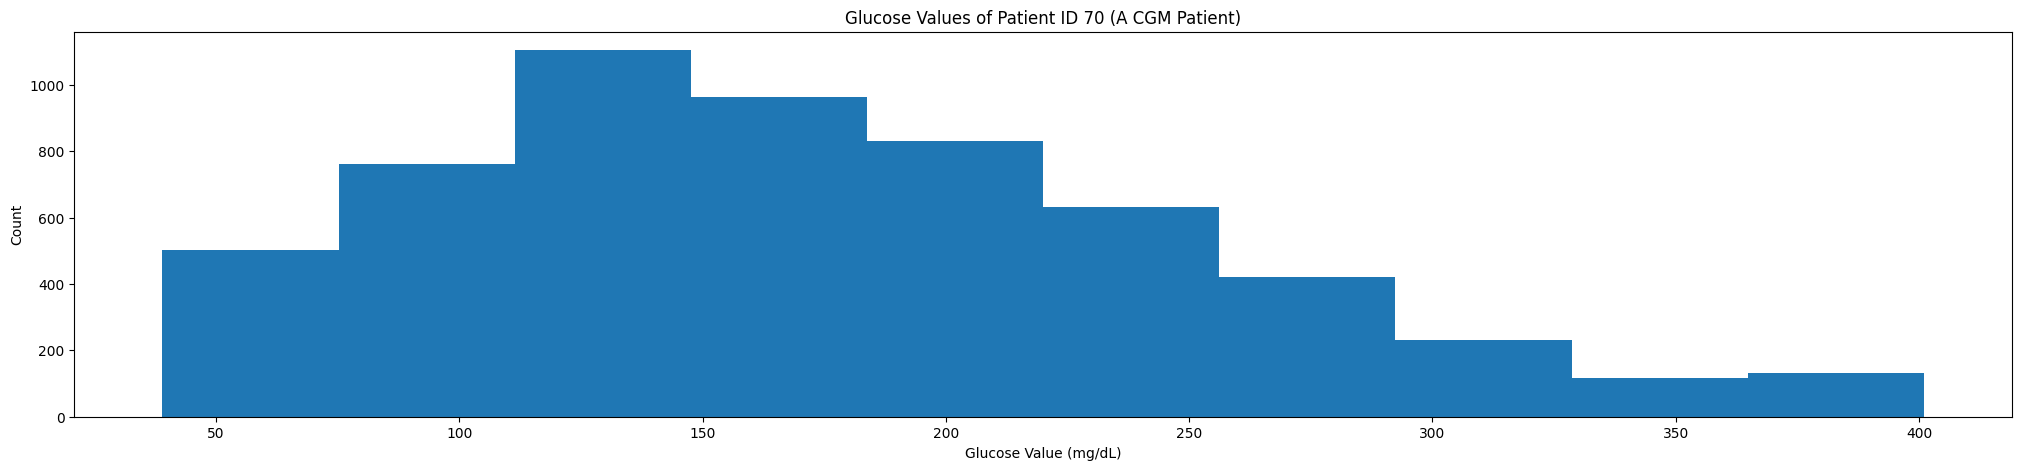

In [ ]:
plt.figure(figsize=(25,5))
plt.hist(df6_2['Glucose Value'] )
plt.xlabel('Glucose Value (mg/dL)')
plt.ylabel('Count')
plt.title('Glucose Values of Patient ID 70 (A CGM Patient)')

From df6_2 a histogram showing Patient ID 70's glucose values can be created.

In [ ]:
df6_2_1 = df6_1[df6_1['Patient ID']==44]
df6_2_1

,DateTime,Glucose Value,Patient ID
1042741,2000-03-25 18:48:32,107,44
1042742,2000-03-25 18:53:31,107,44
1042743,2000-03-25 18:58:31,106,44
1042744,2000-03-25 19:03:31,100,44
1042745,2000-03-25 19:08:31,103,44
...,...,...,...
1048570,2000-07-15 17:54:09,186,44
1048571,2000-07-15 17:59:09,186,44
1048572,2000-07-15 18:04:09,193,44
1048573,2000-07-15 18:09:09,216,44


df6_2_1 was created in the same way as df6_2 but this time it was to extract the glucose values of Patient Id 44.

Text(0.5, 1.0, 'Glucose Values of Patient ID 44 (A BGM Patient)')

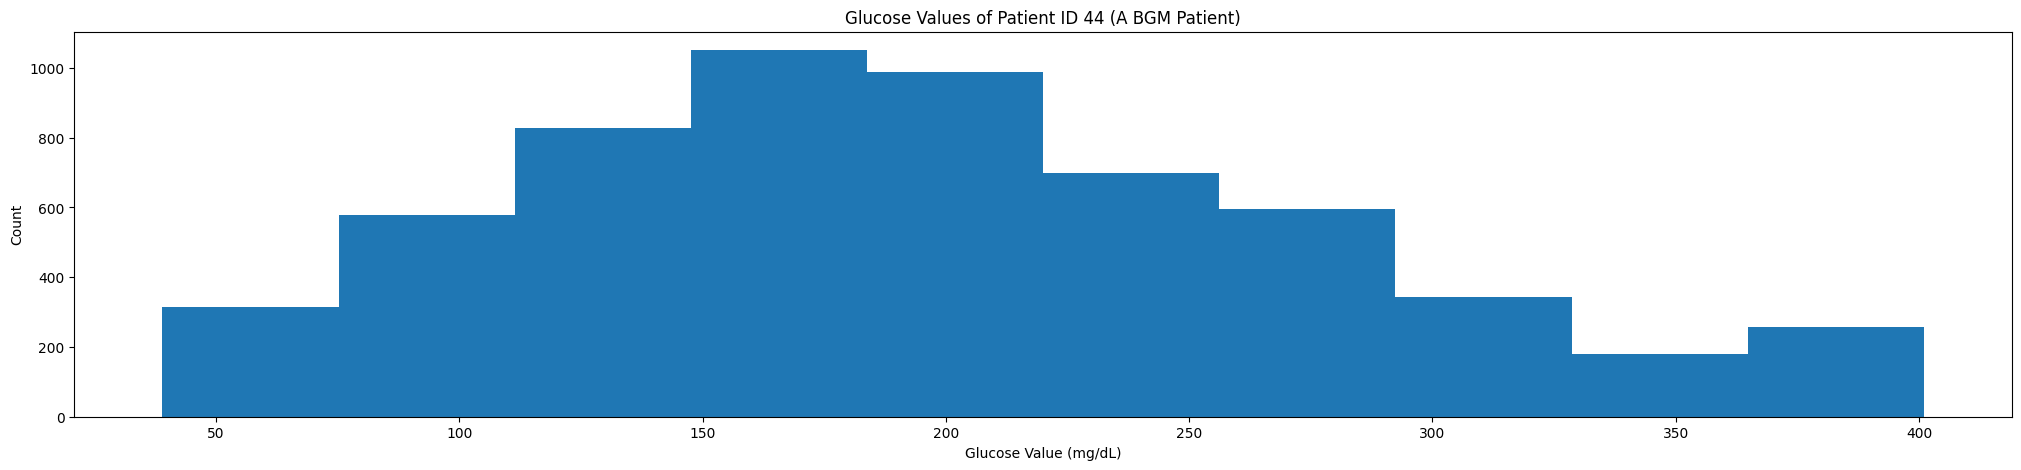

In [ ]:
plt.figure(figsize=(25,5))
plt.hist(df6_2_1['Glucose Value'] )
plt.xlabel('Glucose Value (mg/dL)')
plt.ylabel('Count')
plt.title('Glucose Values of Patient ID 44 (A BGM Patient)')

Again a histogram was created using the glucose values of Patient ID 44.

Patient ID 70 and 44's glucose values were extracted as 70 belongs to the CGM group whereas 44 belongs to the BGM. The histograms show that both patients blood glucose values follow a nealry normal distribution, which is important for later calculations.

A new dataframe was created using the data collected from the the randomised control trial, also known as Phase 1 of the study. This included information such as the glucose value, treatment group and which visit it was recorded at.

In [ ]:
df6_3 = df6[['TrtGroup', 'Value', 'visit']]
print(df6_3)

        TrtGroup  Value          visit
0            CGM     93  Randomization
1            CGM     92  Randomization
2            CGM     96  Randomization
3            CGM    101  Randomization
4            CGM    107  Randomization
...          ...    ...            ...
1048570      BGM    186  13 week visit
1048571      BGM    186  13 week visit
1048572      BGM    193  13 week visit
1048573      BGM    216  13 week visit
1048574      BGM    227  13 week visit

[1048575 rows x 3 columns]


In [ ]:
x = df6_3.groupby(['TrtGroup', 'visit']).mean()
print(x)
y = df6_3.groupby(['TrtGroup', 'visit']).std()
print(y)

                             Value
TrtGroup visit                    
BGM      13 week visit  207.815593
         26 week visit  222.780212
         Randomization  209.203342
CGM      13 week visit  202.397047
         26 week visit  199.408356
         Randomization  211.729527
                            Value
TrtGroup visit                   
BGM      13 week visit  96.215428
         26 week visit  97.894132
         Randomization  96.755793
CGM      13 week visit  84.315317
         26 week visit  85.696603
         Randomization  94.019137


The groupby function was used to group the data togther by treatment group and visit. The mean and standard deviation functions were then applied to find the mean glucose value and the standard deviations at randomization (week 0 of the trial), week 13 and week 26 visits for the different treatment groups.

In [ ]:
CGM_CV_randomization = (94.019/211.729)*100
CGM_CV_week26 = (85.697/199.408)*100
BGM_CV_randomization = (96.756/209.203)*100
BGM_CV_week26 = (97.894/222.780)*100
print(CGM_CV_randomization)
print(CGM_CV_week26)
print(BGM_CV_randomization)
print(BGM_CV_week26)

44.405348346235044
42.97570809596406
46.24981477321071
43.942005566029266


From the standard deviations I was able to calculate the coefficient of variation (CV). The CV summarizes the variation as a proportion of the mean value. This can be used instead of standard devaition as someone with a higher mean glucose level will also have a higher standard deviation. By using CV this helps to normalize glucose variability. [3]


Ideally most experts want to see a CV of 33% or lower. From the results above we can see that none of the the CV values meet this goal. However, we can also see that both the CV of the CGM and BGM did fall over the course of the size weeks. While BGM did have a bigger improvement, the CGM still has the lowest CV value meaning it has the least glucose variability.

In [ ]:
J_CGM_rand = 0.001*(211.729 + 94.019)**2
J_CGM_26 = 0.001*(199.408 + 85.697)**2
J_BGM_rand = 0.001*(222.78 + 98.756)**2
J_BGM_26 = 0.001*(209.203 + 97.894)**2
print(J_CGM_rand)
print(J_CGM_26)
print(J_BGM_rand)
print(J_BGM_26)

93.48183950400004
81.28486102500001
103.385399296
94.30856740899998


Above the J-index has also been calculated for the CGM and BGM values at randomization and week 26. The J-index is similar to the CV value as it is also a parameter for measuring the average blood glucose level and its variability over time. [4]

From above again we can see that that both groups showed an improvement in variability from randomization to week 26. Along with this although BGM had the biggest difference CGM still had the lowest variability.

The J-index is still a relativitely new parameter for calculating glucose variability and has not yet been widely adopted by health-care proffesionals. CV is the more common parameter.

In [ ]:
SE = math.sqrt(((8.31**2)/74) + ((1.135**2)/79))
T = (12.32 - 13.57)/(SE)
scipy.stats.t.sf(abs(T), df=73)

0.10180795365833413

As it can be seen from the 2 histograms created using the glucose values from Patient Id's 70 and 44, the glucose values follow a nearly normal distribution, meaning a T-test can be performed to find the p-value for the hypothesis test.  As this was to compare the difference from randomization and week 26 for the CGM and BGM, the differences for CGM and BGM between the 2 weeks was calculated, and it was these values that were used in the calculation.

From this we got a p-value that is equal to 0.102. As this is bigger than the signficance level of 0.05, we fail to reject the null hypothesis, that was stated at the beginning of this notebook. This means that from the data provided there is currently not enough evidence to suggest that CGM leads to lower glucose variability compared to that of BGM.

**References**

[1] E. Hackett, A. Gallagher, N. Jacques (2013 March) "Type 1 diabetes: pathophysiology and diagnosis" *the Pharaceutical Journal* [online] https://pharmaceutical-journal.com/article/ld/type-1-diabetes-pathophysiology-and-diagnosis

[2] National Insititute for Health and Care Excellence (2023 July) "Diabetes - type 1: How common is it?" [online]  https://cks.nice.org.uk/topics/diabetes-type-1/background-information/incidence-prevalence/#:~:text=About%208%25%20of%20people%20with%20diabetes%20have%20type,type%201%20diabetes%20%5B%20Diabetes%20UK%2C%202019%20%5D.


[3]A. Brown, D. Gopisetty (2018 October) "Understanding Average Glucose, Standard Deviation, CV, and Blood Sugar Variability" *diaTribe Learn* [online] https://diatribe.org/understanding-average-glucose-standard-deviation-cv-and-blood-sugar-variability

[4]F.J. Service (2013 April) "Glucose Variability" *American Diabetes Association* [online] vol. 62 issue. 5 https://diabetesjournals.org/diabetes/article/62/5/1398/42890/Glucose-Variability